In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 

In [1]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,auc

# Collecting and Exploring the Dataset

In [3]:
# fetch dataset
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

heart_disease_df = pd.DataFrame()
heart_disease_df = pd.concat([X,y],axis=1)

In [4]:
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [6]:
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
heart_disease_df = heart_disease_df.dropna(axis=0,how='any')
heart_disease_df.shape

(297, 14)

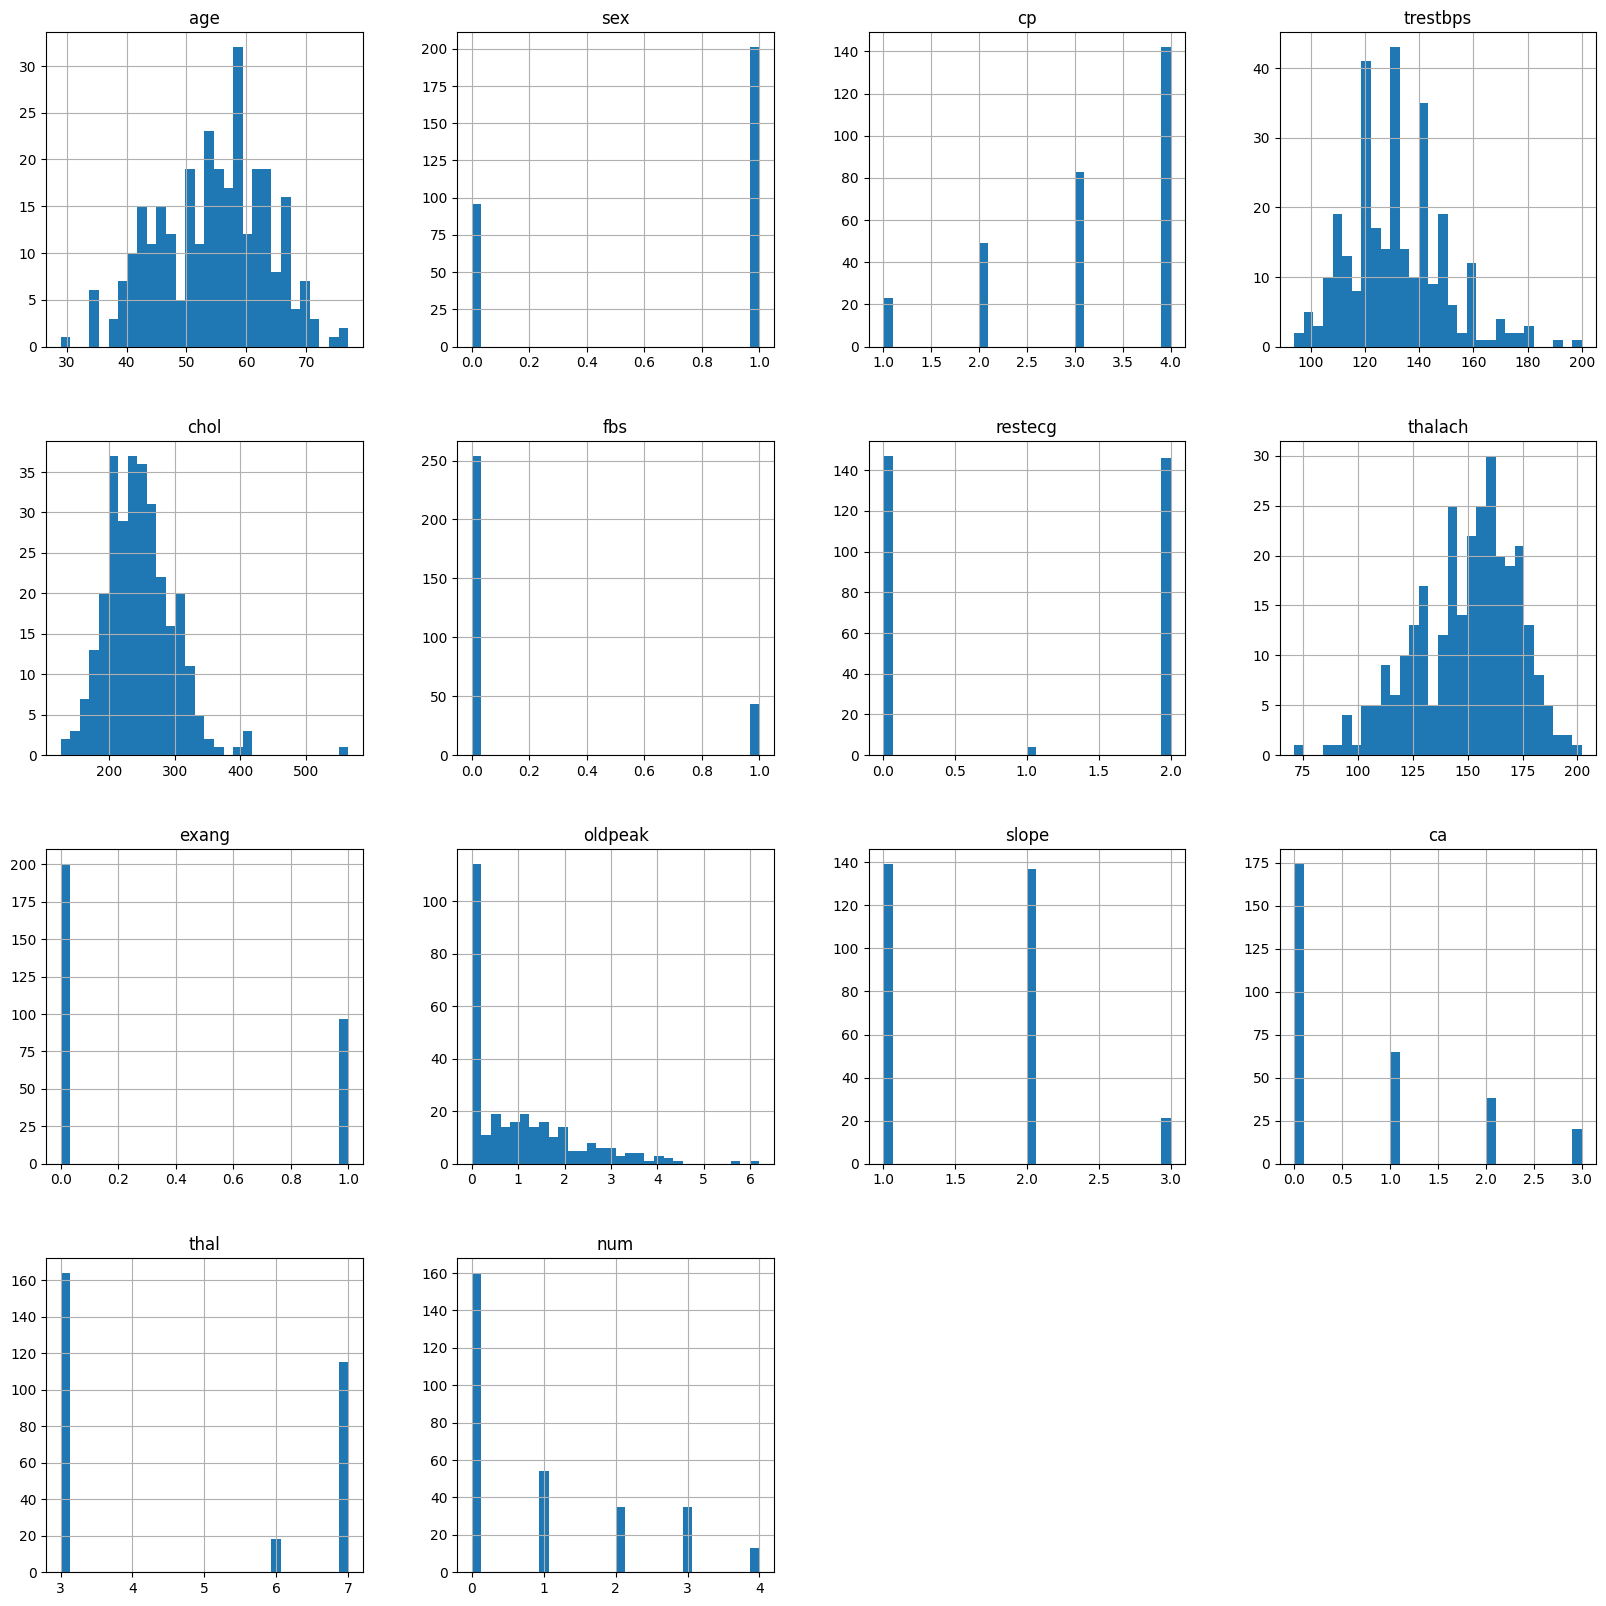

In [8]:
heart_disease_df.hist(bins=30,figsize=(20,20))
plt.show()

In [9]:
heart_disease_df['diagnosis'] = heart_disease_df['num'].apply(lambda x: 0 if x == 0 else 1)
heart_disease_df = heart_disease_df.drop(['num'],axis=1)

In [10]:
train_heart_disease_abs_df = heart_disease_df[heart_disease_df['diagnosis']==0].sample(n=90,random_state=42)
test_heart_disease_abs_df = heart_disease_df[heart_disease_df['diagnosis']==0].drop(train_heart_disease_abs_df.index)
train_heart_disease_pre_df = heart_disease_df[heart_disease_df['diagnosis']==1].sample(n=90,random_state=42)
test_heart_disease__pre_df = heart_disease_df[heart_disease_df['diagnosis']==1].drop(train_heart_disease_pre_df.index)
train_heart_disease_df = pd.concat([train_heart_disease_abs_df,train_heart_disease_pre_df],ignore_index=True)
test_heart_disease_df = pd.concat([test_heart_disease_abs_df,test_heart_disease__pre_df],ignore_index=True)

In [11]:
train_X = train_heart_disease_df.drop(['diagnosis'],axis=1)
test_X = test_heart_disease_df.drop(['diagnosis'],axis=1)
train_Y = train_heart_disease_df['diagnosis']
test_Y = test_heart_disease_df['diagnosis']

# Building a Decision Tree Classifier Model

In [23]:
decision_tree_model = DecisionTreeClassifier(max_depth=8,ccp_alpha=0.005,random_state=4)
decision_tree_model.fit(train_X,train_Y)
train_pred_Y_dtc = decision_tree_model.predict(train_X)
test_pred_Y_dtc = decision_tree_model.predict(test_X)

In [24]:
print("Accuracy score for training set:",round(accuracy_score(train_Y,train_pred_Y_dtc),2))
print("Accuracy score for testing set:",round(accuracy_score(test_Y,test_pred_Y_dtc),2))

Accuracy score for training set: 0.99
Accuracy score for testing set: 0.82


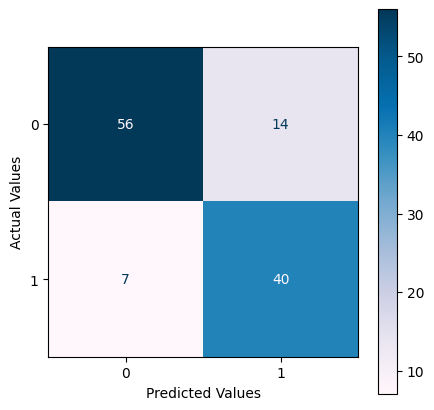

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        70
           1       0.74      0.85      0.79        47

    accuracy                           0.82       117
   macro avg       0.81      0.83      0.82       117
weighted avg       0.83      0.82      0.82       117



In [63]:
conf_matrix_dtc = confusion_matrix(test_Y,test_pred_Y_dtc)
fig,ax = plt.subplots(figsize=(5,5))
disp_dtc = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp_dtc.plot(cmap=plt.cm.PuBu, ax=ax)
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
plt.show()
print(classification_report(test_Y,test_pred_Y_dtc))

# Building a Random Forest Classifier

In [60]:
random_forest_model = RandomForestClassifier(n_estimators=120,random_state=42)
random_forest_model.fit(train_X,train_Y)
train_pred_Y_rfc = random_forest_model.predict(train_X)
test_pred_Y_rfc = random_forest_model.predict(test_X)

In [61]:
print("Accuracy on the training set:",round(accuracy_score(train_Y,train_pred_Y_rfc),2))
print("Accuracy on the testing set:",round(accuracy_score(test_Y,test_pred_Y_rfc),2))

Accuracy on the training set: 1.0
Accuracy on the testing set: 0.85


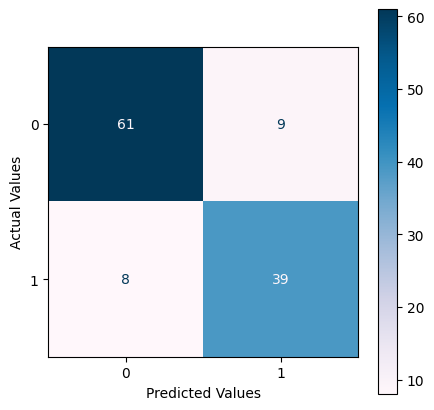

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        70
           1       0.81      0.83      0.82        47

    accuracy                           0.85       117
   macro avg       0.85      0.85      0.85       117
weighted avg       0.86      0.85      0.85       117



In [62]:
conf_matrix_rfc = confusion_matrix(test_Y,test_pred_Y_rfc)
fig,ax = plt.subplots(figsize = [5,5])
disp_rfc = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rfc)
disp_rfc.plot(cmap=plt.cm.PuBu,ax=ax)
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
plt.show()
print(classification_report(test_Y,test_pred_Y_rfc))

# Comparing the Models

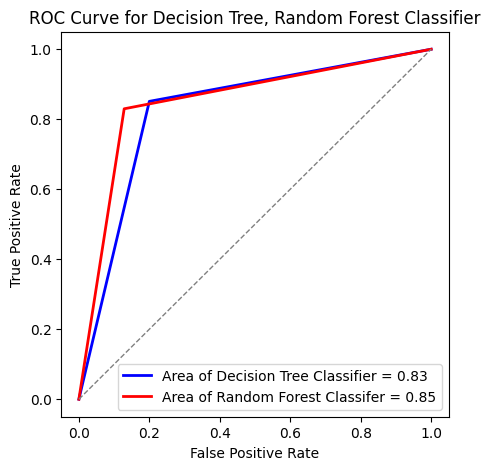

In [66]:
fpr_dtc,tpr_dtc,threshold_dtc = roc_curve(test_Y,test_pred_Y_dtc)
fpr_rfc,tpr_rfc,threshold_rfc = roc_curve(test_Y,test_pred_Y_rfc)
roc_auc_dtc = auc(fpr_dtc,tpr_dtc)
roc_auc_rfc = auc(fpr_rfc,tpr_rfc)

plt.figure(figsize=[5,5])
plt.plot(fpr_dtc,tpr_dtc,lw=2,c='b',label="Area of Decision Tree Classifier = %0.2f" % roc_auc_dtc)
plt.plot(fpr_rfc,tpr_rfc,lw=2,c='r',label="Area of Random Forest Classifer = %0.2f" % roc_auc_rfc)
plt.plot([0,1],[0,1],lw=1,c='gray',linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree, Random Forest Classifier")

plt.legend()
plt.show()

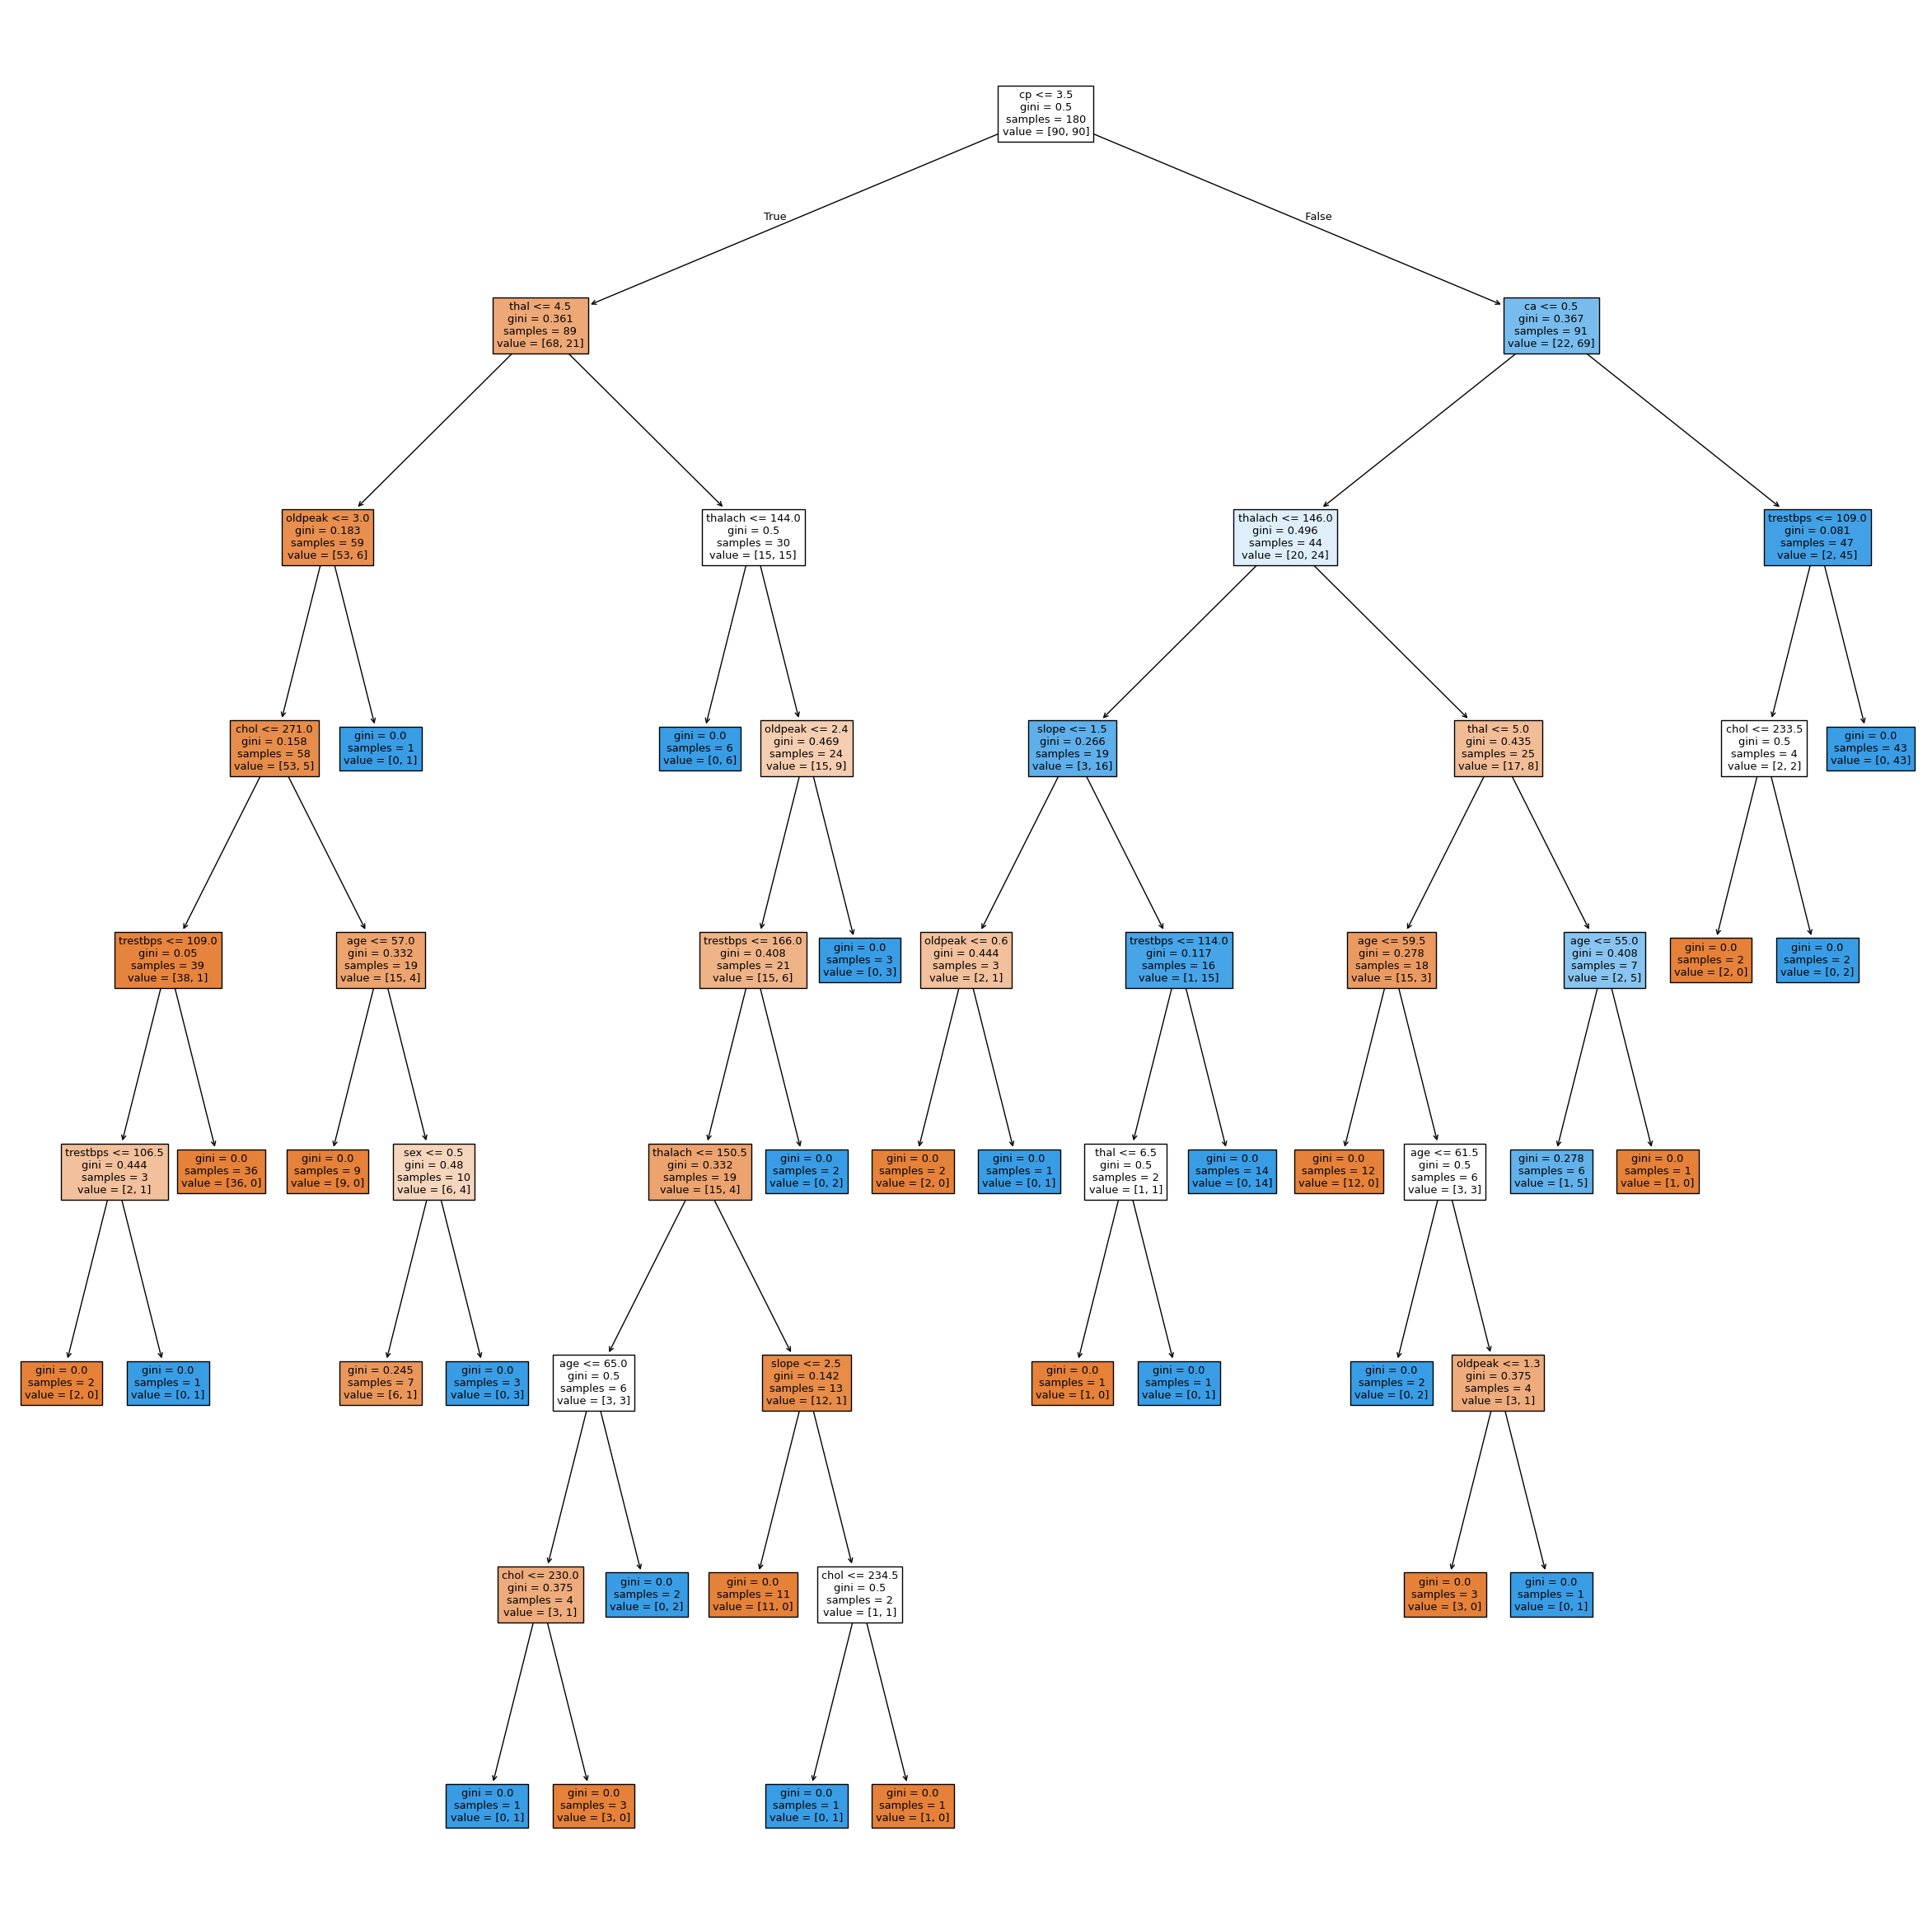

In [247]:
plt.figure(figsize=[30,30])
plot_tree(decision_tree_model,feature_names=train_X.columns,filled=True)
plt.show()